In [3]:
#%pip install seaborn
#%pip install pandas_profiling
#%pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable
  Using cached ipywidgets-8.0.2-py3-none-any.whl (134 kB)
  Using cached jupyterlab_widgets-3.0.3-py3-none-any.whl (384 kB)
  Using cached widgetsnbextension-4.0.3-py3-none-any.whl (2.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly as py
#import plotly.graph_objs as go

# Data analysis automático. 
import pandas_profiling as profile
#import dabl
# Silenciamos las warnings para este notebook pero esto no es recomendable!!
import warnings
warnings.filterwarnings('ignore')

# Bienvenidos al análisis de compras Online!

Este notebook está ligado al caso descrito en la Ppt. Su objetivo es explorar los datos inicialmente para determinar que variables podrían ser interesantes para utilizar en un modelo de predicción de Compra vs No Compra en una página Web. Somos una página de varios productos, entonces la intención de compra es referente a diferentes elementos del catálogo. El ingeniero de datos anterior perdió la variable de la categoría del producto, pero, creo que podríamos trabajar con lo que hay. Tú que opinas Data Scientist? Tenemos lo que necesitamos?

In [2]:
# Empezamos cargando los datos
url = "https://raw.githubusercontent.com/patofw/imf_master/master/Google_Colab/online_shoppers_intention.csv"
# Pandas nos permite hacerlo directamente de una Url
data = pd.read_csv(url, encoding="latin-1") 
data

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [ ]:
data.info() # Lo primero es siempre ver la info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
# Veamos la cabecera de los datos!

data.head(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False


In [ ]:
# Vemos que tan complejo es el panorama en relación a datos faltantes

missing_percentage = data.isnull().sum()/data.shape[0]
print(missing_percentage)

Administrative             0.001135
Administrative_Duration    0.001135
Informational              0.001135
Informational_Duration     0.001135
ProductRelated             0.001135
ProductRelated_Duration    0.001135
BounceRates                0.001135
ExitRates                  0.001135
PageValues                 0.000000
SpecialDay                 0.000000
Month                      0.000000
OperatingSystems           0.000000
Browser                    0.000000
Region                     0.000000
TrafficType                0.000000
VisitorType                0.000000
Weekend                    0.000000
Revenue                    0.000000
dtype: float64


In [ ]:
# Descripción de algunos datos numéricos. 

data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


Los factores numéricos son algo extraños, revisemoslos con mayor detalle. Veamos primero las columnas de Google Analytics y luego podemos analizar la duración en la página

# EDA 

La fase de análisis exploratorio (EDA -> Exploratory Data Analysis) es de gran importancia pues nos da una idea inicial del problema al que nos enfrentamos. Nos permite encontrar correlaciones iniciales y además, podremos identificar datos extraños, anómalos o incongruentes. Algo de vital importancia en cualquier proyecto de datos. 


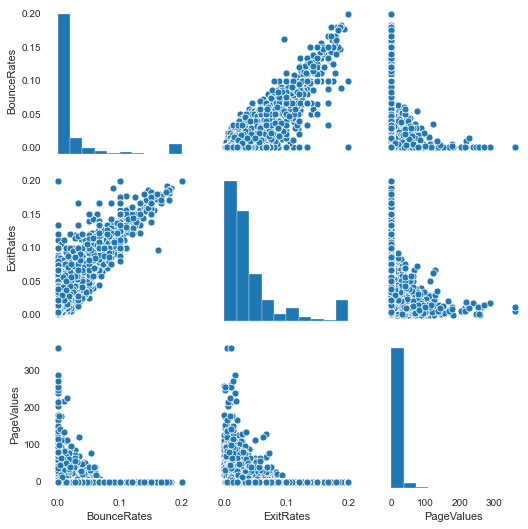

In [ ]:
# Seaborn nos permite analizar todas las columnas numéricas del Dataset 
# con una linea de código, sí solo una linea
cols_gooana = ['BounceRates', 'ExitRates', 'PageValues']
sns.pairplot(data[cols_gooana]);

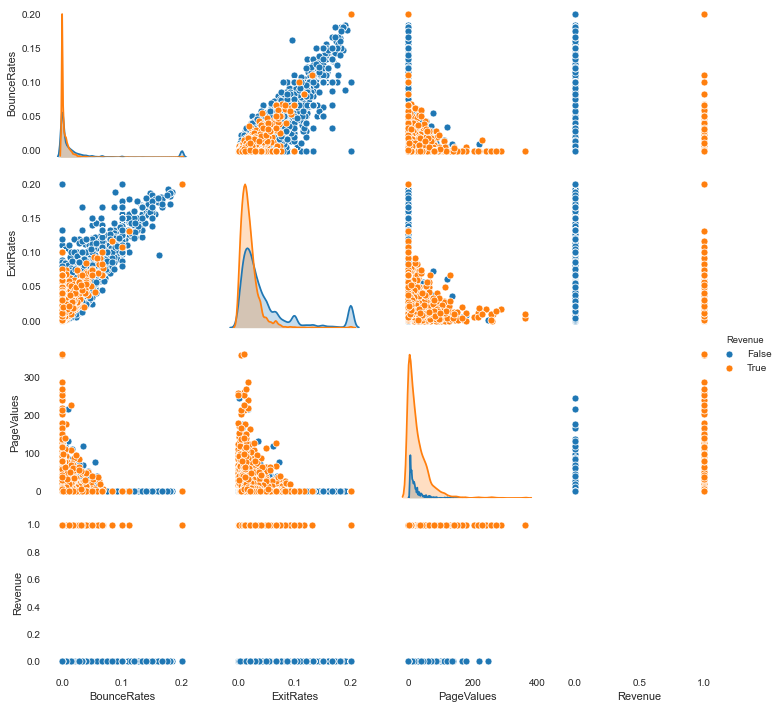

In [ ]:
# si agregamos el parametro Hue, podemos separar entre compra o no compra
cols_gooana = ['BounceRates', 'ExitRates', 'PageValues', 'Revenue']
sns.pairplot(data[cols_gooana], hue="Revenue");


¿Qué puedes ver en el Exit Rate y Bounce Rate?

Las columnas de tiempo de visita tienen datos extremos extraños, veamoslo a detalle

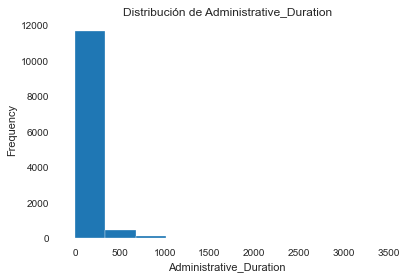

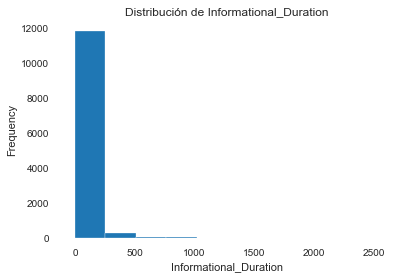

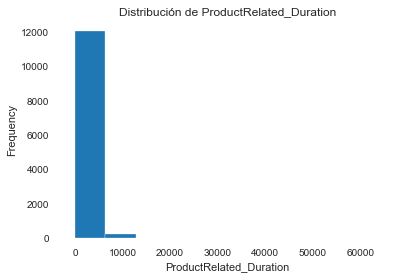

In [ ]:
# Podemos ver la distribucion
cols_duracion = [
                 'Administrative_Duration',
                 'Informational_Duration', 
                 'ProductRelated_Duration',
       ]

for col in cols_duracion:
    # filtramos solo esa columna para plotear y sacamos sus valores
    data[col].plot(kind = "hist")
    # Decoramos el plot
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.show(); # Mostramos el Plot



Hay gente que ha estado 60 000 segundos (17 horas) en una página?
Qué significan los -1??


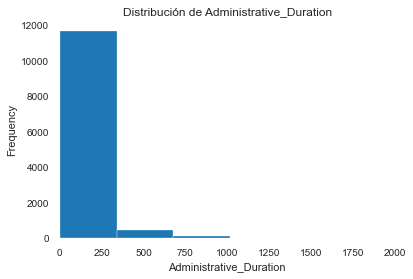

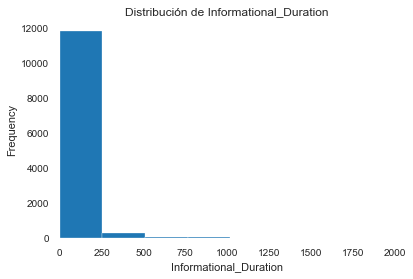

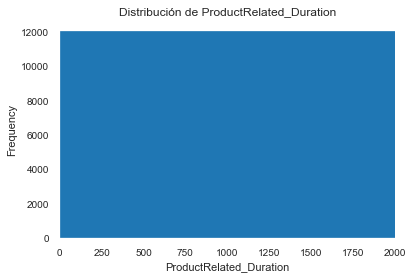

In [ ]:
# Volvemos a plotear la distribución pero limitando el eje X
for col in cols_duracion:
    # filtramos solo esa columna para plotear y sacamos sus valores
    data[col].plot(kind = "hist")
    # Decoramos el plot
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.xlim(0,2000) # limite eje X
    plt.show(); # Mostramos el Plot


El tiempo en las páginas de producto puede ser interesante, lo veremos luego. Volvamos a la variable objetivo. Qué tan grave es el problema de los que abandonan la compra?

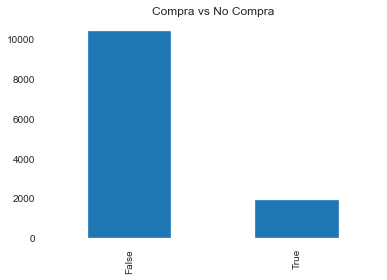

In [ ]:
# Value counts te ordena los datos de esa columna por mayor a menor en frecuencia
data.Revenue.value_counts().plot(kind = "bar", title = "Compra vs No Compra");

Veamos la relación de nuestra variable objetivo con las variables categóricas

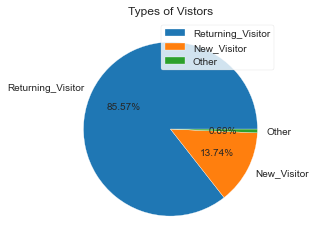

In [ ]:
# Exploramos vs Nuevo visita o Recurrente
labels = ['Returning_Visitor','New_Visitor','Other']
plt.title("Types of Vistors")
plt.pie(data['VisitorType'].value_counts(),labels=labels,autopct = '%.2f%%')
plt.legend();

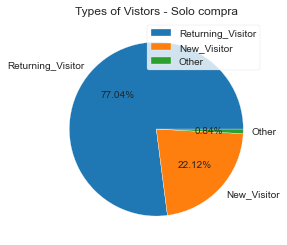

In [ ]:
# Y ahora si queremos plotear solo los que compraron? 
solo_compra = data[data.Revenue == True] # Filtamos por solo los que compraron
labels = ['Returning_Visitor','New_Visitor','Other']
plt.title("Types of Vistors - Solo compra")
plt.pie(solo_compra['VisitorType'].value_counts(),
        labels=labels,autopct = '%.2f%%')
plt.legend();


In [ ]:
# Que cantidad de los nuevos visitantes compra?

solo_nuevas_visitas = data[data.VisitorType == "New_Visitor"]
solo_nuevas_visitas.Revenue.value_counts()

False    1272
True      422
Name: Revenue, dtype: int64

In [ ]:
# Si lo queremos en porcentaje
solo_nuevas_visitas.Revenue.value_counts() / len(solo_nuevas_visitas)


False    0.750885
True     0.249115
Name: Revenue, dtype: float64

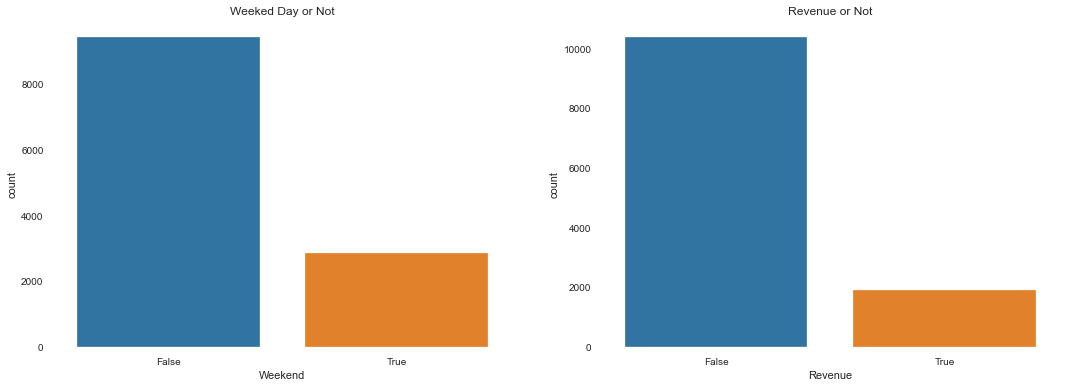

In [ ]:
# Compras en fin de semana??
plt.rcParams['figure.figsize'] = (18,6)
# Usamos subplot para agrupar plots en el mismo eje
plt.subplot(1,2,1)  # 1 fila, 2 columnas, posicion 1
plt.title("Weeked Day or Not")
sns.countplot(data['Weekend']);


plt.subplot(1,2,2) # 1 fila, 2 columnas, posicion 2
plt.title("Revenue or Not")
sns.countplot(data['Revenue']);


Parecen los mismos gráficos, podemos explorar más a profundidad?

**Pista**: Aquí hay una trampa!!

In [ ]:
# agrupamos con groupby por Revenue y Weekend
group = data.groupby(["Weekend","Revenue"])[
    'Revenue'].count().rename("count") # hacemos count, lo llamamos count
porcentajes = group / group.groupby(level=0).sum() # dividimos los valores por el total
porcentajes

Weekend  Revenue
False    False      0.851089
         True       0.148911
True     False      0.826011
         True       0.173989
Name: count, dtype: float64

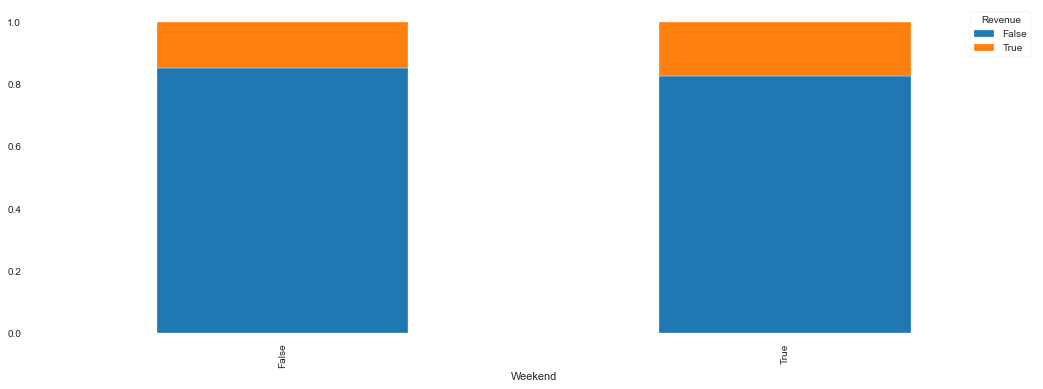

In [ ]:
porcentajes.unstack().plot(kind='bar', stacked=True);

Ahora que vemos que los patrones de compra se mantienen entre fin de semana y día laboral en términos relativos, veamos si el sistema operativo tiene alguna pista

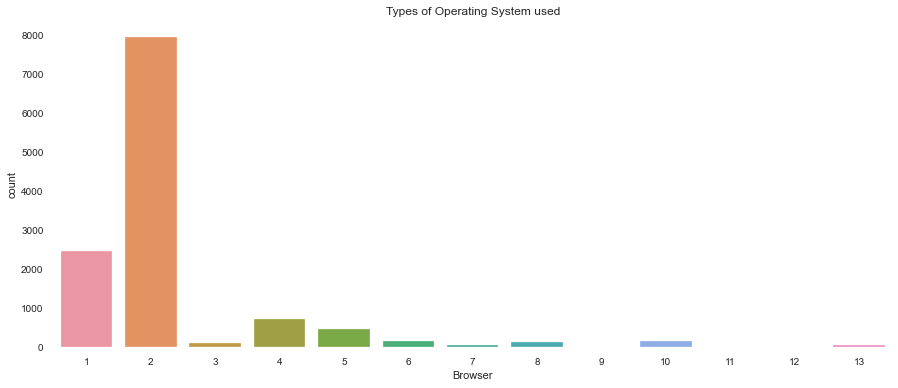

In [ ]:
plt.figure(figsize=(15,6))
plt.title("Types of Operating System used")
plt.xlabel("Operating System Used")
sns.countplot(data['Browser']);

Interesante, lo puedes graficar en terminos relativos por compra o no compra?


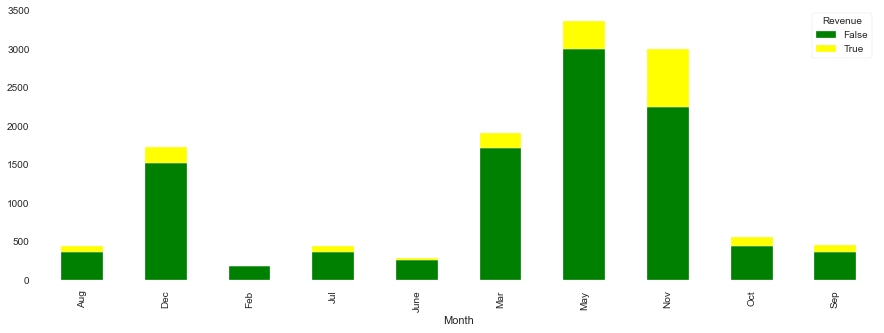

In [ ]:
# El mes del año tiene alguna influencia?
pd.crosstab(data['Month'],
            data['Revenue']).plot(kind = 'bar', 
                                  stacked = True, 
                                  figsize = (15, 5), 
                                  color = ['green', 'yellow']);


Porque noviembre tiene tanta efectividad y febrero tan baja?

### Volvamos a las variables numéricas 

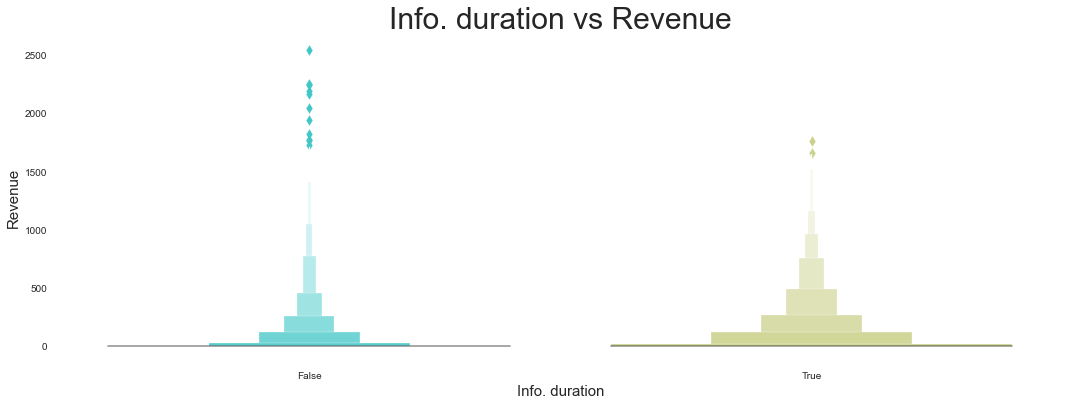

In [ ]:
# TIempo en las páginas de información
sns.boxenplot(data['Revenue'], data['Informational_Duration'], palette = 'rainbow')
plt.title('Info. duration vs Revenue', fontsize = 30)
plt.xlabel('Info. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15);

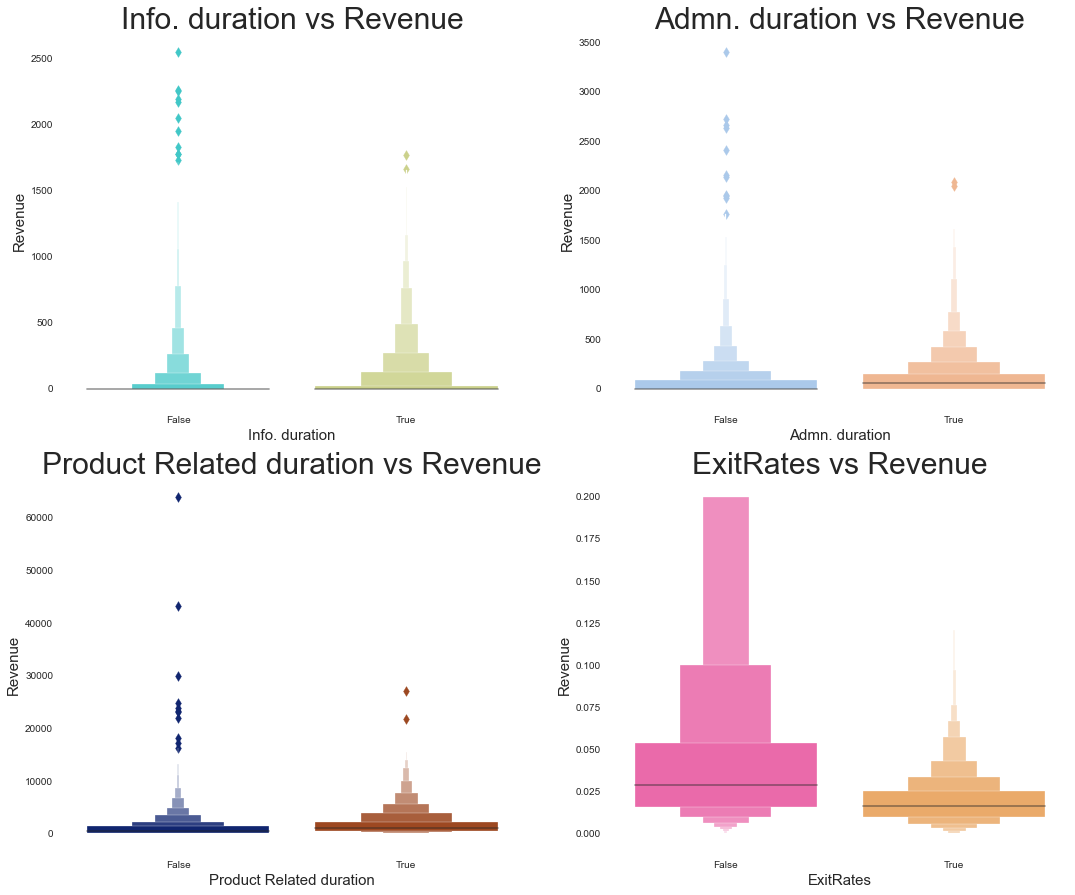

In [ ]:
# Si queremos hacerlo en una solo imagen, más elegante.

plt.rcParams['figure.figsize'] = (18, 15)

plt.subplot(2, 2, 1) # 2 filas, 2 columnas, pos 1
sns.boxenplot(data['Revenue'], data['Informational_Duration'], palette = 'rainbow')
plt.title('Info. duration vs Revenue', fontsize = 30)
plt.xlabel('Info. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# product  duration vs revenue

plt.subplot(2, 2, 2) # 2 filas, 2 columnas, pos 2
sns.boxenplot(data['Revenue'], data['Administrative_Duration'], palette = 'pastel')
plt.title('Admn. duration vs Revenue', fontsize = 30)
plt.xlabel('Admn. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)


# product  duration vs revenue

plt.subplot(2, 2, 3) # 2 filas, 2 columnas, pos 3
sns.boxenplot(data['Revenue'], data['ProductRelated_Duration'], palette = 'dark')
plt.title('Product Related duration vs Revenue', fontsize = 30)
plt.xlabel('Product Related duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# exit rate vs revenue

plt.subplot(2, 2, 4) # 2 filas, 2 columnas, pos 4
sns.boxenplot(data['Revenue'], data['ExitRates'], palette = 'spring')
plt.title('ExitRates vs Revenue', fontsize = 30)
plt.xlabel('ExitRates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)


plt.show();

La gente que compra, parece en promedio estar menos tiempo en la página. Qué nos dice esto a nivel de estrategia de ventas?

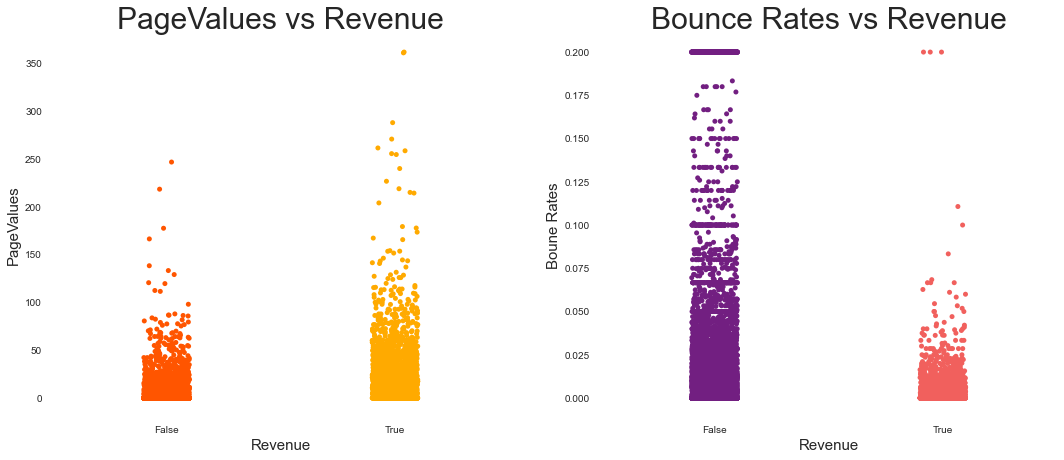

In [ ]:
# page values vs revenue

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.stripplot(data['Revenue'], data['PageValues'], palette = 'autumn')
plt.title('PageValues vs Revenue', fontsize = 30)
plt.ylabel('PageValues', fontsize = 15)
plt.xlabel('Revenue', fontsize = 15)

# bounce rates vs revenue
plt.subplot(1, 2, 2)
sns.stripplot(data['Revenue'], data['BounceRates'], palette = 'magma')
plt.title('Bounce Rates vs Revenue', fontsize = 30)
plt.ylabel('Boune Rates', fontsize = 15)
plt.xlabel('Revenue', fontsize = 15)

plt.show()

# Herramientas que simplifican la vida del Data Scientist

La exploración de datos es una tarea larga pero sumamente importante. Para eso, podemos ayudarnos de algunas herramientas y librerías como [Pandas Profiler](https://pandas-profiling.github.io/pandas-profiling/docs/master/index.html) o [DABL](https://pypi.org/project/dabl/)
Para instalarlas ejecuta la siguiente celda o mejor, hazlo directamente en la terminal 

In [ ]:
!pip install pandas_profiling
!pip install dabl

**DABL** Nos permite agregar una columna Objetivo y con ello analizar su relación con las otras variables del DataSet

Target looks like classification
Linear Discriminant Analysis training set score: 0.653


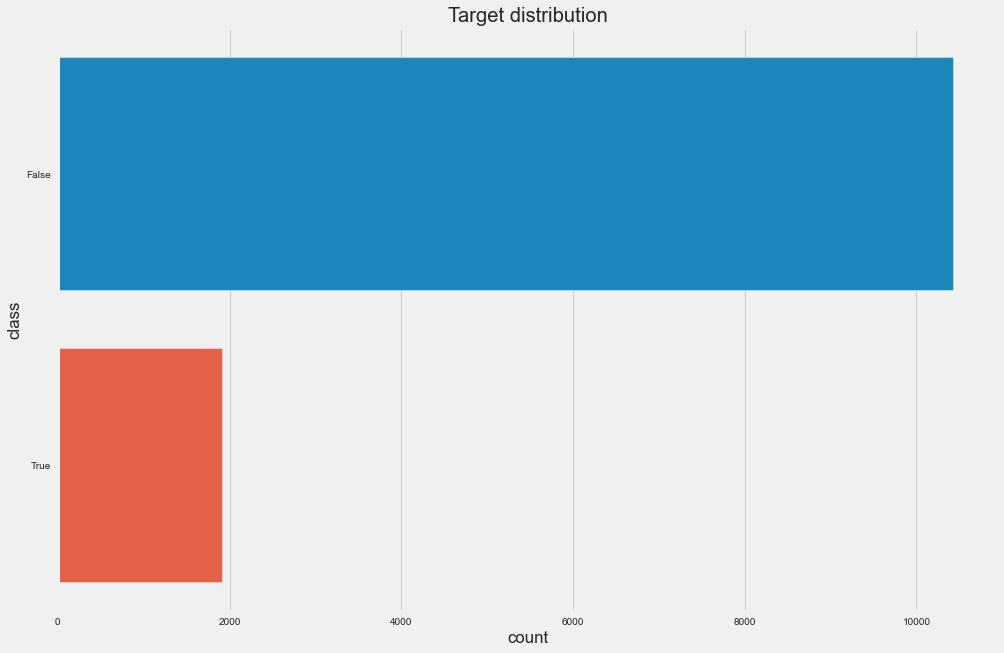

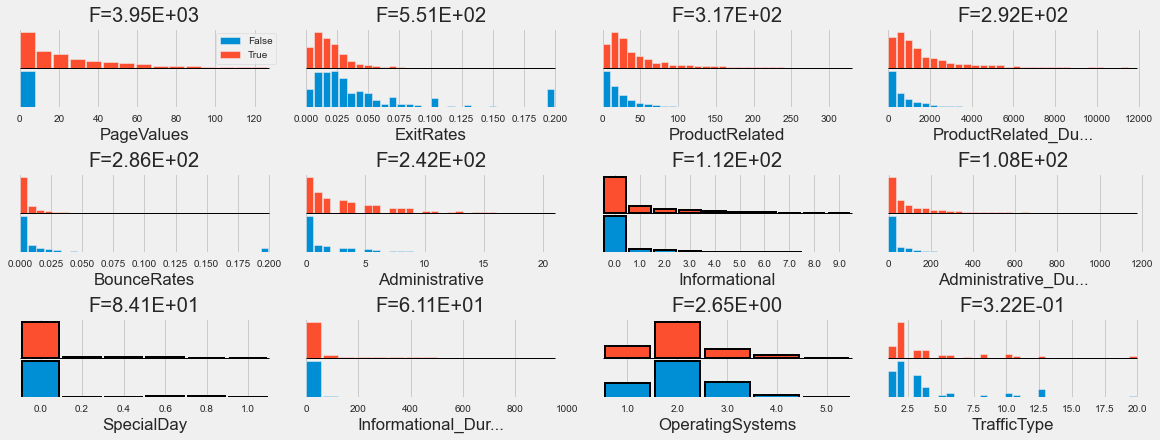

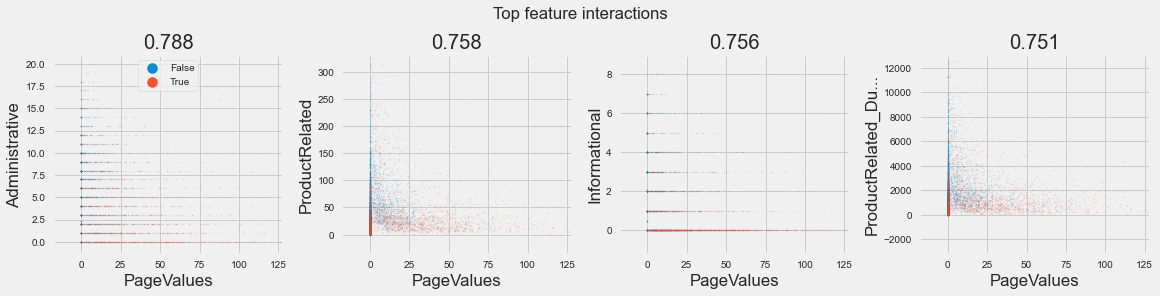

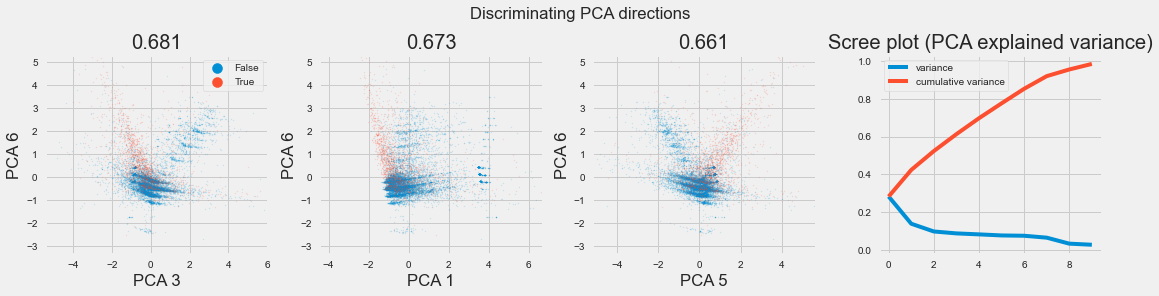

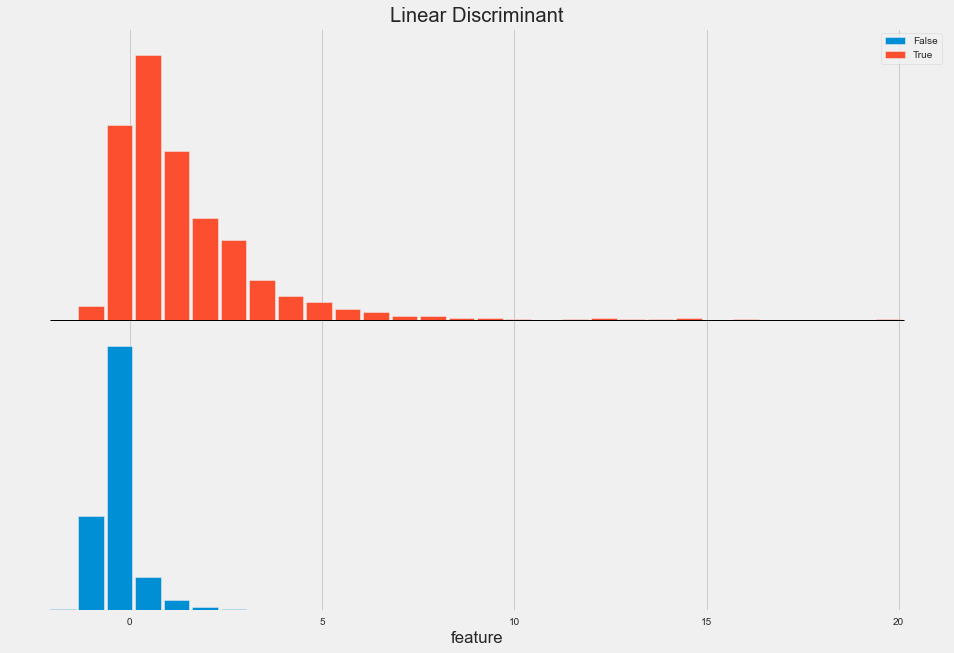

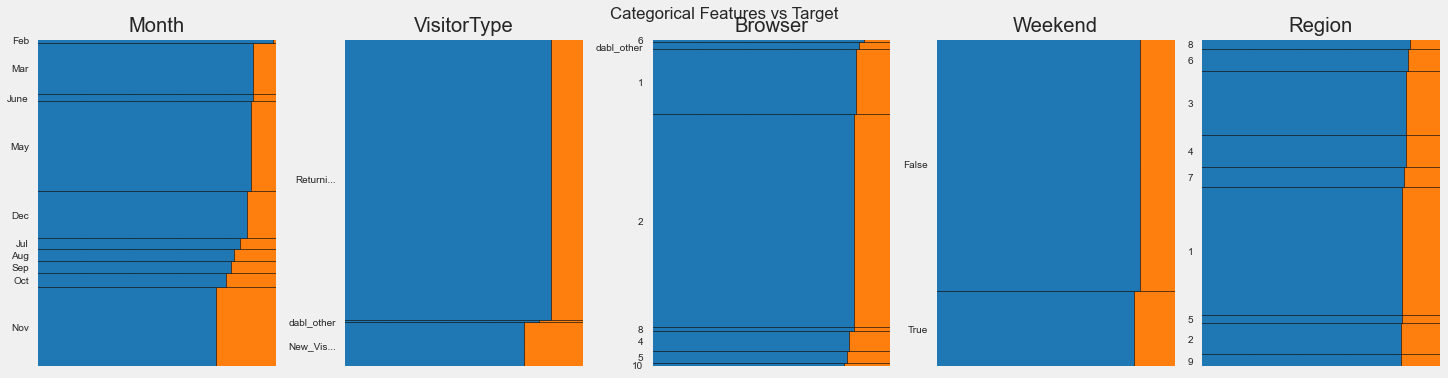

In [ ]:
# Analizamos todas las variables frente a nuestra variable objetivo

plt.rcParams['figure.figsize'] = (15, 10)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'Revenue')
plt.show()

**Profile de Pandas** También tiene una API HTML de exploración increíblemente poderosa. ¿Qué podemos encontrar a primera vista?

In [ ]:
profile = pandas_profiling.ProfileReport(data)
print(profile)

NameError: ignored

Quieres seguir explorando y trabajando en este Dataset? Visita este [enlace en Kaggle](https://www.kaggle.com/roshansharma/online-shopper-s-intention/data)